In [1]:
import pandas as pd
import spacy

# Load the arXiv CSV file
df = pd.read_csv("arxiv_hyperspectral_imaging.csv")

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

#basic stopwords
basic_stopwords = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
    "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
    "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
    "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an",
    "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about",
    "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up",
    "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when",
    "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no",
    "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don",
    "should", "now"
]
# Add custom stop words
custom_stopwords = basic_stopwords + ["data", "information", "research", "result", "method", "hyperspectral", "image", "imaging", "hsi", "spectral", "use", "study", "approach", "paper", "propose", "base", "algorithm", "datum", "dataset", "model", "result", "state", "art", "problem", "analysis", "work", "diifferent", "technique", "provide", "present", "different", "introduce", "include", "performance", "performe", "perform", "proposed", "develop", "application", "evaluate", "compare", "achieve", "show", "apply", "consider", "investigate", "discuss", "sample", "obtain", "demonstrate", "experiment", "new", "novel" "https", "github", "com"]


# Function to clean text
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc 
              if not token.is_stop and not token.is_punct and token.lemma_.lower() not in custom_stopwords]
    return " ".join(tokens)

# Apply the preprocessing to your text column
df['cleaned_text'] = df['Abstract'].apply(preprocess_text)

# Display the cleaned data
print(df[['Abstract', 'cleaned_text']].head(10))



                                            Abstract  \
0    The hyperspectral unmixing method is an algo...   
1    The exceptional spectral resolution of hyper...   
2    This thesis proposes spatio-spectral techniq...   
3    In this paper, we proposed a novel pipeline ...   
4    In this paper, we propose a method using a t...   
5    Retrieving the reflectance spectrum from obj...   
6    Depth reconstruction and hyperspectral refle...   
7    Traditional snapshot hyperspectral imaging s...   
8    In this paper, a synthetic hyperspectral vid...   
9    Hyperspectral imagery provides abundant spec...   

                                        cleaned_text  
0     unmixing extract material \n usually call e...  
1     exceptional resolution imagery enable mater...  
2     thesis spatio \n adaptive spatio support va...  
3     novel pipeline level classification \n disc...  
4     dimensional convolutional \n neural network...  
5     retrieve reflectance spectrum object essent... 

In [175]:
from collections import Counter

# Flatten all words into a single list
all_words = ' '.join(df['cleaned_text']).split()
word_freq = Counter(all_words)

# Display the 30 most common words
print(word_freq.most_common(30))


[('spatial', 1494), ('classification', 1199), ('network', 1116), ('feature', 1099), ('high', 1025), ('learning', 859), ('pixel', 812), ('resolution', 805), ('deep', 706), ('low', 678), ('band', 645), ('real', 571), ('time', 511), ('learn', 490), ('detection', 472), ('task', 457), ('training', 452), ('unmixing', 449), ('matrix', 449), ('framework', 438), ('noise', 423), ('neural', 413), ('novel', 404), ('$', 404), ('design', 401), ('reconstruction', 398), ('remote', 397), ('set', 391), ('non', 390), ('large', 390)]


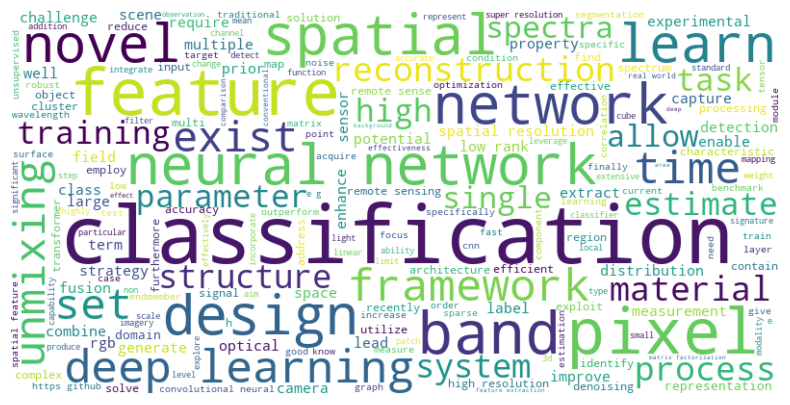

In [179]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [180]:
from sklearn.feature_extraction.text import CountVectorizer

# Create bigrams
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words='english')
X2 = vectorizer.fit_transform(df['cleaned_text'])

# Sum up the counts of each bigram
bigram_counts = X2.sum(axis=0).A1
bigrams = vectorizer.get_feature_names_out()
bigram_freq = dict(zip(bigrams, bigram_counts))

# Display the 30 most common bigrams
sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True)[:30]


[('neural network', np.int64(346)),
 ('deep learning', np.int64(341)),
 ('spatial resolution', np.int64(245)),
 ('low rank', np.int64(227)),
 ('high resolution', np.int64(192)),
 ('remote sense', np.int64(191)),
 ('remote sensing', np.int64(184)),
 ('github com', np.int64(162)),
 ('https github', np.int64(161)),
 ('https github com', np.int64(161)),
 ('convolutional neural', np.int64(160)),
 ('spatial feature', np.int64(147)),
 ('super resolution', np.int64(136)),
 ('convolutional neural network', np.int64(135)),
 ('matrix factorization', np.int64(117)),
 ('real world', np.int64(117)),
 ('feature extraction', np.int64(115)),
 ('high dimensional', np.int64(114)),
 ('available https', np.int64(103)),
 ('real time', np.int64(103)),
 ('high spatial', np.int64(102)),
 ('synthetic real', np.int64(102)),
 ('classification accuracy', np.int64(98)),
 ('ground truth', np.int64(97)),
 ('machine learning', np.int64(97)),
 ('available https github', np.int64(93)),
 ('code available', np.int64(87)),

In [10]:


from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['cleaned_text'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=12, random_state=42)
lda.fit(X)

# Display topics
for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[::-1][:30]])
    print("\n")



Topic #1:
['exciton', 'strain', 'monolayer', 'defect', 'gp', '_2', 'semiconductor', 'trion', 'electronic', 'quantum', 'optical', 'electron', 'nanoscale', 'photoluminescence', 'ctis', 'disorder', 'tomography', 'emitter', 'resonant', 'carrier', 'molecular', 'absorption', 'transition', 'site', 'tomographic', 'nanowire', 'vacancy', 'autonomous', 'wavefront', 'tunneling']


Topic #2:
['spatial', 'classification', 'network', 'feature', 'high', 'pixel', 'learning', 'resolution', 'deep', 'band', 'low', 'matrix', 'real', 'detection', 'tensor', 'training', 'learn', 'time', 'noise', 'reconstruction', 'task', 'framework', 'cnn', 'material', 'neural', 'label', 'unmixing', 'set', 'remote', 'rank']


Topic #3:
['amp', 'htd', 'grassmannian', 'polynomial', 'software', 'wiener', 'fpga', 'waste', 'crism', 'plastic', 'pruning', 'sorting', 'linguistic', 'cosmf', 'aberration', 'ec', 'lmm', 'svdd', 'twist', 'droplet', 'plant', 'virtual', 'mir', 'molecular', 'pareto', 'rbf', 'dislocation', 'maturity', 'kenned

In [9]:
import plotly.express as px
import pandas as pd

# Extract year and count keywords (as done previously)
df['year'] = pd.to_datetime(df['Published Date']).dt.year

keywords = ['deep learning', 'backpropagation', 'support vector', 
            'decision trees', 'random forest', 'knn', 
            'logistic regression', 'bayes']

for keyword in keywords:
    df[keyword + '_count'] = df['cleaned_text'].apply(lambda x: x.count(keyword))

# Group by year and sum keyword counts
yearly_keyword_counts = df.groupby('year')[
    [keyword + '_count' for keyword in keywords]
].sum()

# Reshape the data for Plotly (long format for better visualization)
plot_data = yearly_keyword_counts.reset_index().melt(
    id_vars='year', 
    var_name='Keyword', 
    value_name='Count'
)

# Create interactive line plot with Plotly
fig = px.line(
    plot_data, 
    x='year', 
    y='Count', 
    color='Keyword', 
    title='Keyword Trends by Year',
    labels={'year': 'Year', 'Count': 'Keyword Count'}
)

fig.update_layout(
    hovermode='x unified',
    legend_title_text='Methods',
    template='plotly_white'
)

fig.update_xaxes(
    dtick=1,
    tickmode='linear',
    tickangle=45  
)

fig.show()



In [11]:


# Step 3: Transform documents to get the topic distribution for each document
topic_distributions = lda.transform(X)

# Step 4: Create a DataFrame for topic distributions
# Each row is a document, each column is a topic, and the values are probabilities
topic_df = pd.DataFrame(topic_distributions, columns=[f'Topic {i+1}' for i in range(lda.n_components)])

# Step 5: Calculate the overall distribution of topics across all documents
overall_topic_distribution = topic_df.mean().sort_values(ascending=False)
print("Overall topic distribution:")
print(overall_topic_distribution)

# Optional: View topic distribution for each document
print("\nDocument-wise topic distribution (first 5 documents):")
print(topic_df.head())


Overall topic distribution:
Topic 2     0.715539
Topic 11    0.038826
Topic 6     0.036456
Topic 7     0.033198
Topic 1     0.031264
Topic 10    0.024475
Topic 9     0.023916
Topic 4     0.021485
Topic 8     0.020555
Topic 3     0.018380
Topic 5     0.018234
Topic 12    0.017672
dtype: float64

Document-wise topic distribution (first 5 documents):
    Topic 1   Topic 2   Topic 3   Topic 4   Topic 5   Topic 6   Topic 7  \
0  0.014639  0.763945  0.014639  0.014639  0.014639  0.014639  0.014639   
1  0.010562  0.660834  0.010561  0.010561  0.010562  0.233551  0.010561   
2  0.013731  0.774281  0.013731  0.013731  0.013731  0.088406  0.013731   
3  0.014486  0.692094  0.014486  0.014485  0.163049  0.014486  0.014488   
4  0.013106  0.815620  0.013106  0.013106  0.013106  0.013106  0.013108   

    Topic 8   Topic 9  Topic 10  Topic 11  Topic 12  
0  0.014639  0.014639  0.014639  0.089664  0.014639  
1  0.010562  0.010561  0.010561  0.010562  0.010561  
2  0.013733  0.013731  0.013731  0.01

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


num_docs = len(topic_df)  # 总文档数
topic_counts = (topic_df.sum(axis=0) * num_docs / topic_df.sum(axis=0).sum()).astype(int)

topic_counts_dict = topic_counts.to_dict()
print("Distribution of Topics:")
print(topic_counts_dict)


Distribution of Topics:
{'Topic 1': 53, 'Topic 2': 1218, 'Topic 3': 31, 'Topic 4': 36, 'Topic 5': 31, 'Topic 6': 62, 'Topic 7': 56, 'Topic 8': 35, 'Topic 9': 40, 'Topic 10': 41, 'Topic 11': 66, 'Topic 12': 30}


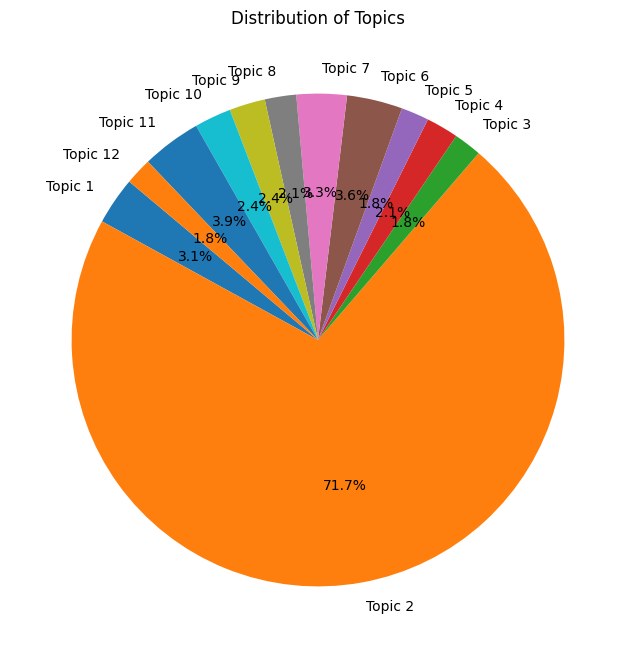

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(topic_counts, labels=topic_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Topics")
plt.show()
